케라스로 구현하는 선형 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 1s 533ms/step - loss: 4195.1470 - mse: 4195.1470
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 517.2859 - mse: 517.2859
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 64.7513 - mse: 64.7513
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 9.0689 - mse: 9.0689
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2162 - mse: 2.2162
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3716 - mse: 1.3716
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2663 - mse: 1.2663
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2520 - mse: 1.2520
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2488 - mse: 1.2488
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2471 - mse: 1.2471
Epoch 11/300
1/1 [==============================] - 0s 7ms/step -

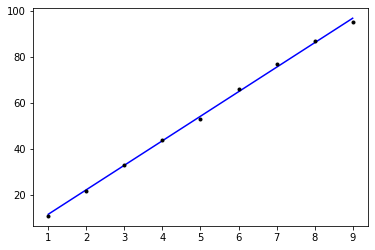

In [ ]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[102.152115]]


## 로지스틱 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
# 옵티마이저로는 가장 기본적인 경사 하강법인 sgd
sgd = optimizers.SGD(lr=0.01)
# 이진 분류 문제에 손실 함수로 크로스 엔트로피 함수를 사용할 경우 binary_crossentropy를 기재
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
1/1 [==============================] - 0s 370ms/step - loss: 0.2204 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2173 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2148 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2128 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.2111 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2096 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2084 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2073 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2064 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 7ms/st

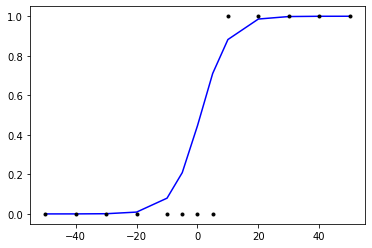

In [ ]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [ ]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.5015858 ]
 [0.5570841 ]
 [0.6111929 ]
 [0.66269386]
 [0.6871478 ]]
[[0.9034599 ]
 [0.9886397 ]
 [0.9987658 ]
 [0.99986714]
 [1.        ]]


## 다중 선형 회귀

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
# 입력의 차원이 3으로 바뀌면서, input_dim의 인자값이 3으로 변경
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/2000
1/1 [==============================] - 0s 457ms/step - loss: 4084.6902 - mse: 4084.6902
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 2153.9734 - mse: 2153.9734
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 1135.9680 - mse: 1135.9680
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 599.1884 - mse: 599.1884
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 316.1408 - mse: 316.1408
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 166.8797 - mse: 166.8797
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 88.1636 - mse: 88.1636
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 46.6471 - mse: 46.6471
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 24.7478 - mse: 24.7478
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 13.1945 - mse: 13.1945
Epoch 11/2000
1/1 [=========

In [ ]:
print(model.predict(X))

[[72.91898 ]
 [81.98095 ]
 [72.10218 ]
 [57.120026]
 [33.800686]]


In [ ]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

[[57.874184]
 [56.0708  ]]


## 다중 로지스틱 회귀

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 333ms/step - loss: 1.0352 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.0328 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.0305 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.0282 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.0259 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.0236 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.0214 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.0191 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.0169 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [==============================] -

In [ ]:
print(model.predict(X))

[[0.2212427 ]
 [0.475208  ]
 [0.48144504]
 [0.7426791 ]
 [0.74742687]
 [0.7521163 ]]


## 소프트맥스 회귀 실습

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


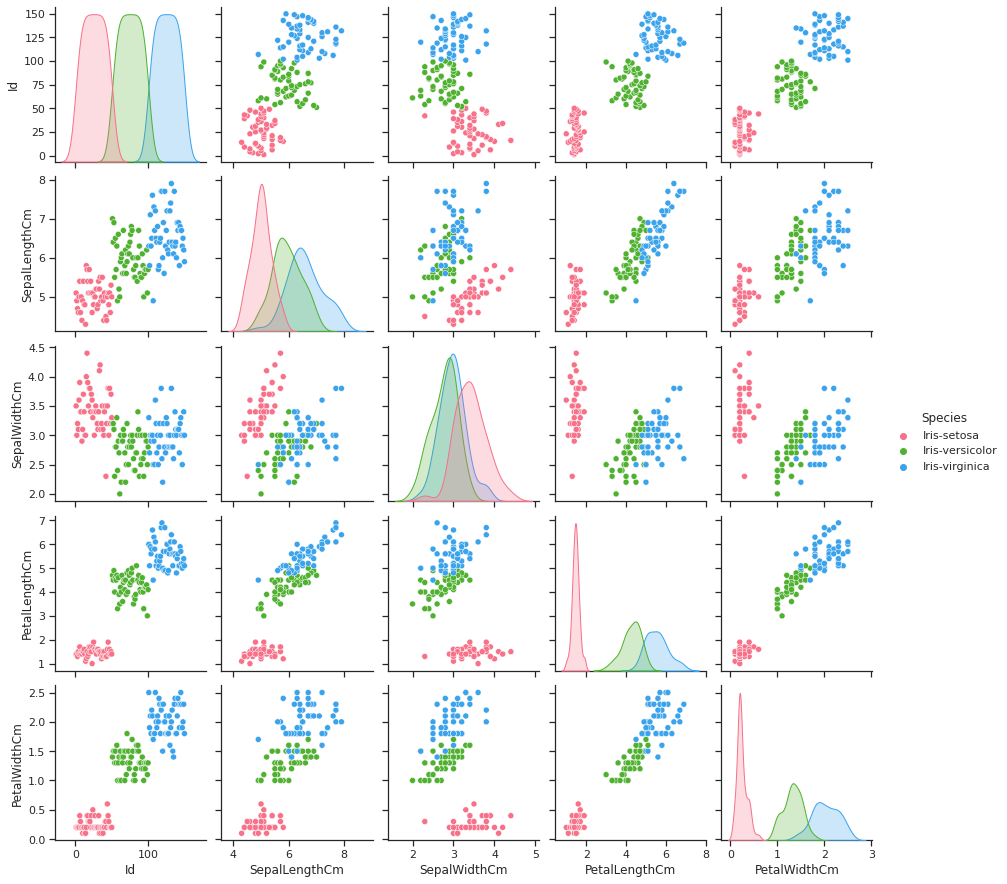

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

In [ ]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])

In [ ]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [ ]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 출력의 차원이 3이므로 input_dim=4 앞의 인자값이 3, activation의 인자값으로 'softmax'
model.add(Dense(3, input_dim=4, activation='softmax'))
#  다중 클래스 분류 문제에서는 'categorical_crossentropy를 사용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 3ms/step - loss: 3.0043 - accuracy: 0.3667 - val_loss: 3.4201 - val_accuracy: 0.2000
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 2.0613 - accuracy: 0.4250 - val_loss: 2.3609 - val_accuracy: 0.4000
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.5309 - accuracy: 0.6417 - val_loss: 1.7791 - val_accuracy: 0.4000
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2180 - accuracy: 0.5167 - val_loss: 1.4001 - val_accuracy: 0.2333
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 1.0301 - accuracy: 0.3917 - val_loss: 1.1864 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 0.9297 - accuracy: 0.3750 - val_loss: 1.0588 - val_accuracy: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 0.8683 - accuracy: 0.3833 - val_loss: 0.9898 - val_accuracy: 0.2000

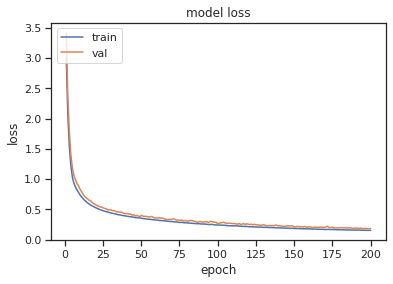

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))